# AI PROJECT ON PNEUMONIA CHEST X-RAY CLASSIFICATION

# BUSINESS CASE:- Based on the image data we need to predict the X-ray is normal or pneumonia. 

### GROUP ID: PTID-AI-Jul-23-1020 

### PROJECT ID: PRAICP-1012-Pneumonia chest x-ray classification

## INTRODUCTION :-

* Pneumonia is a lung inflammation caused by a viral or bacterial infection that can range from mild to severe cases. This inflammation makes the patient unable to breathe enough oxygen to reach the bloodstream. It happens when an infection makes the air sacs (alveoli) in the lungs fill with fluid or pus that might affect either one or both lungs. If your doctor thinks you might have pneumonia, a chest X-ray will be performed to find the infection in the patient's lungs and how far it’s spread.

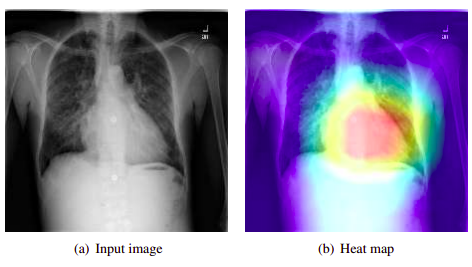

### How can you tell pneumonia from an X-ray ?
* When interpreting the x-ray, the radiologist will look for white spots in the lungs (called infiltrates) that identify an infection. This exam will also help determine if you have any complications related to pneumonia such as abscesses or pleural effusions (fluid surrounding the lungs).

## DATA SUMMARY :- 

**The Data set is contain total 8,546 images of Pneumonia patient chest x-ray , include three class [Normal,pneumonia]**

**Classes :-**

1. NORMAL
2. PNEUMONIA

## TASK: BINARY CLASSIFICATION :-

## WE DEVICE THIS PROJECT INTO MULTIPLE STEPS :-
* Importing library
* Make subset of training,testing & validation
* Data Processing [Prepare training and testing data]
* Visualise Training Images
* Build Arcitecture
* Model Compilation
* Training
* Evaluation
* Model saving
* Prediction
* Testing
* Visualise Test Images
* Deploy model using flask framework

## PYTHON IMPLIMENTATION :-

### IMPORTING NECESSARY LIBRARY :-

In [3]:
import os
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

### MAKE SUBSET OF TRAINING, TESTING, VALIDATION :-

In [5]:
!pip install splitfolders 

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement splitfolders (from versions: none)
ERROR: No matching distribution found for splitfolders


In [6]:
import splitfolders
splitfolders.ratio(r"C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\X_rayData",output='subset',seed=1337)

ValueError: The provided input folder "C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\X_rayData" does not exists.

In [ ]:
# Get the path of training, testing and validation folder
train_dir = r"C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\subset\train"
val_dir = r"C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\subset\val"
test_dir = r"C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\subset\test"

In [ ]:
train_datagen = ImageDataGenerator(rescale=(1./255),
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rotation_range=40,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


val_datagen = ImageDataGenerator(rescale=(1./255),
                                 featurewise_center=True,
                                 featurewise_std_normalization=True,
                                  rotation_range=40,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train_set = train_datagen.flow_from_directory(train_dir,
                                             target_size=(256,256),
                                             batch_size=64,
                                             class_mode='categorical',
                                             color_mode='rgb')

val_set = val_datagen.flow_from_directory(val_dir,
                                         target_size=(256,256),
                                         batch_size =64,
                                         class_mode='categorical',
                                         color_mode='rgb')

test_set = test_datagen.flow_from_directory(test_dir,
                                           target_size=(256,256),
                                           batch_size=64,
                                           class_mode='categorical',
                                           color_mode='rgb')

* After loading data 7546 images for training, 500 images for testing, & 500 images for validation.

### VISUALISE TRAINING IMAGES :-

#### 1.NORMAL DATA :-

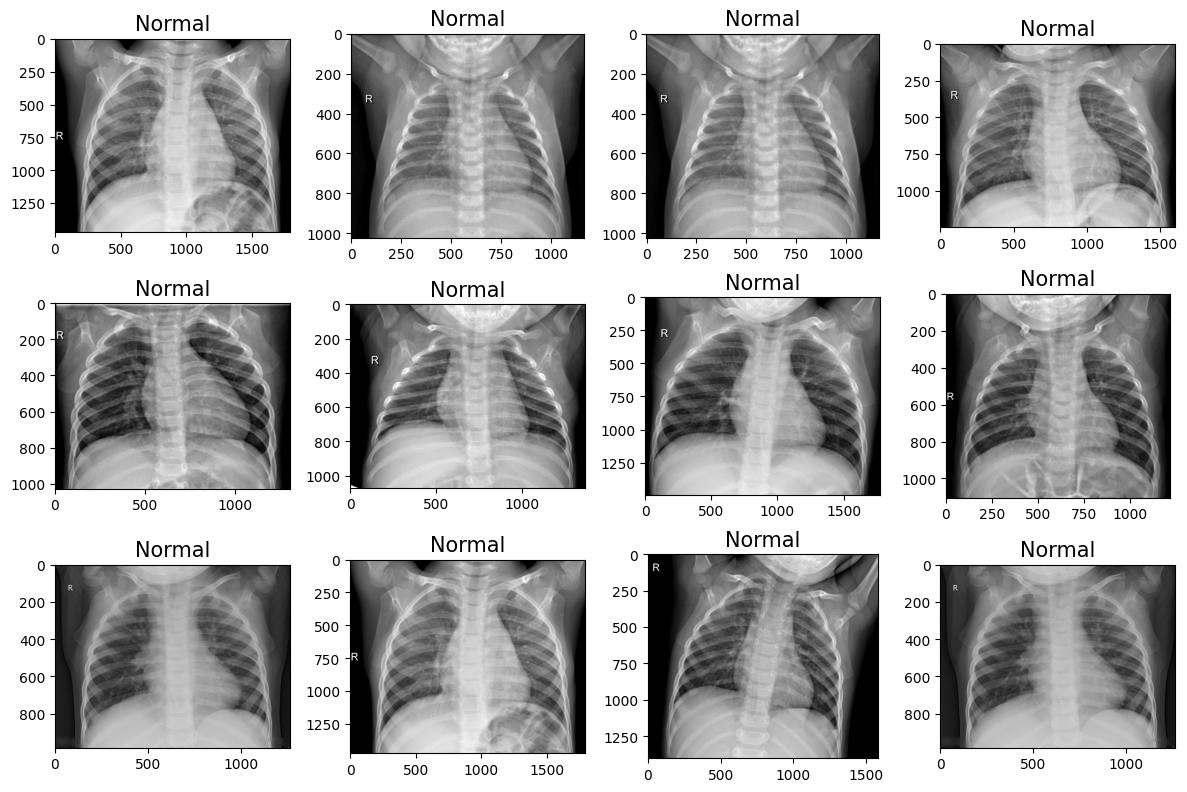

In [ ]:
import os
import cv2

NORMAL = os.listdir(r"C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\subset\train\NORMAL")

plt.figure(figsize=(12,8),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(3,4,i+1)
    img = cv2.imread(r"C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\subset\train\NORMAL" + '/' + NORMAL[i])
    plt.imshow(img)
    plt.title('Normal',fontsize=15)
plt.tight_layout()

#### 2.PNEUMONIA DATA :-

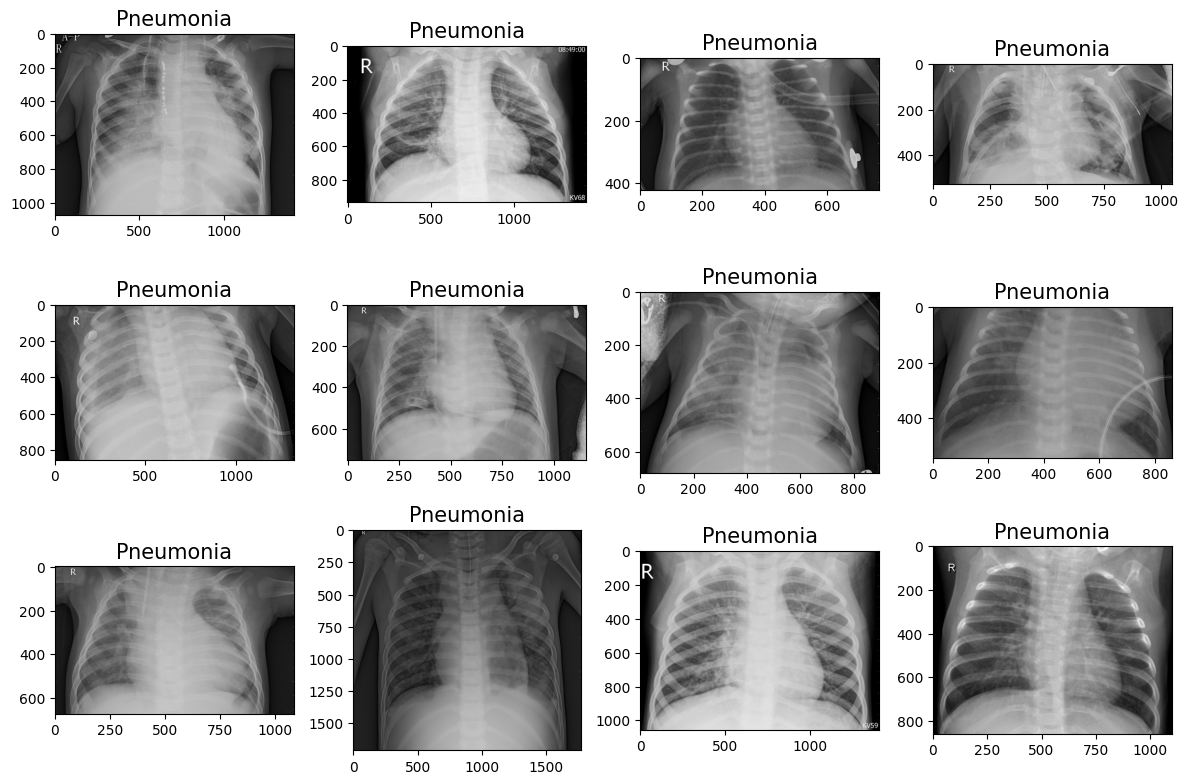

In [ ]:
import os
import cv2

PNEUMONIA = os.listdir(r"C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\subset\train\PNEUMONIA")

plt.figure(figsize=(12,8),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(3,4,i+1)
    img = cv2.imread(r"C:\Users\GANESH AHIRE\Desktop\AI Expert Project\Chest-Xray\subset\train\PNEUMONIA" + '/' + PNEUMONIA[i])
    plt.imshow(img)
    plt.title('Pneumonia',fontsize=15)
plt.tight_layout()


#### Classes analysis :-
* Before importing anything, let's find out if the classes are balanced.

Found 3773 elements for NORMAL
Found 3773 elements for PNEUMONIA


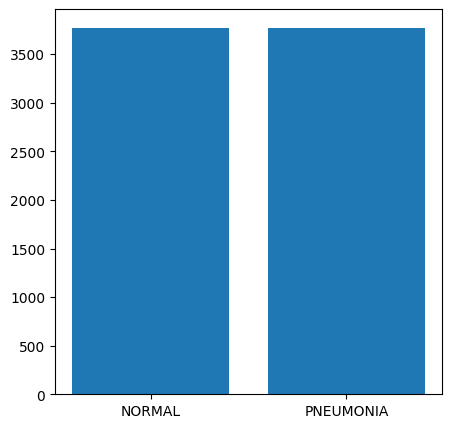

In [ ]:
# Set counters for the number of samples in each class
n_train = len(NORMAL)        # Number of samples in the 'NORMAL' class
p_train = len(PNEUMONIA)     # Number of samples in the 'PNEUMONIA' class


# Define dictionaries to map class labels to class names and store class counts
class_names = {0: 'NORMAL', 1: 'PNEUMONIA'}  # Mapping class labels to class names
class_count = {0: n_train, 1: p_train}       # Dictionary with class counts

# Print the number of elements (samples) found for each class
print("Found {} elements for {}".format(class_count[0], class_names[0]))
print("Found {} elements for {}".format(class_count[1], class_names[1]))

# Create a bar plot to visualize the class distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.bar([class_names[0], class_names[1]], [class_count[0], class_count[1]])
plt.show()

* The classes are highly balanced

### BUILD VGG16 ARCHITECTURE :-

In [ ]:
# Import Vgg16 library as shown and add preprocessing layer in front og vgg
vgg16_model = Sequential() # Create model object

pretrained_model=tf.keras.applications.vgg16.VGG16(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

# Dont train the existing weights
for layer in pretrained_model.layers:
        layer.trainable=False

# Adding more layer and create a object
vgg16_model.add(pretrained_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(2, activation='sigmoid'))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Model summary
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________


### COMPILE MODEL :-

In [ ]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


### TRAIN MODEL

In [ ]:
history = vgg16_model.fit(train_set, validation_data=val_set, epochs=30)

Epoch 1/30
118/118 [==============================] - 2963s 25s/step - loss: 0.3983 - accuracy: 0.8450 - val_loss: 0.2859 - val_accuracy: 0.8940
Epoch 2/30
118/118 [==============================] - 248s 2s/step - loss: 0.2920 - accuracy: 0.8878 - val_loss: 0.2353 - val_accuracy: 0.9240
Epoch 3/30
118/118 [==============================] - 250s 2s/step - loss: 0.2557 - accuracy: 0.9025 - val_loss: 0.2154 - val_accuracy: 0.9240
Epoch 4/30
118/118 [==============================] - 246s 2s/step - loss: 0.2328 - accuracy: 0.9144 - val_loss: 0.2024 - val_accuracy: 0.9260
Epoch 5/30
118/118 [==============================] - 240s 2s/step - loss: 0.2196 - accuracy: 0.9153 - val_loss: 0.1778 - val_accuracy: 0.9280
Epoch 6/30
118/118 [==============================] - 240s 2s/step - loss: 0.2282 - accuracy: 0.9112 - val_loss: 0.1887 - val_accuracy: 0.9220
Epoch 7/30
118/118 [==============================] - 247s 2s/step - loss: 0.2059 - accuracy: 0.9231 - val_loss: 0.1707 - val_accuracy: 0.93

### PLOTTING TRAINING & VALIDATION ACCURAY AS WELL AS LOSS & VALIDATION LOSS :-

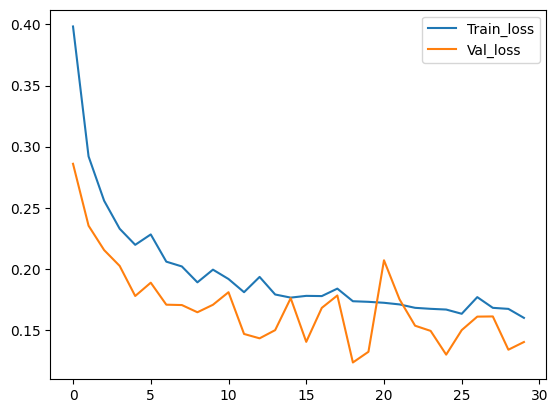

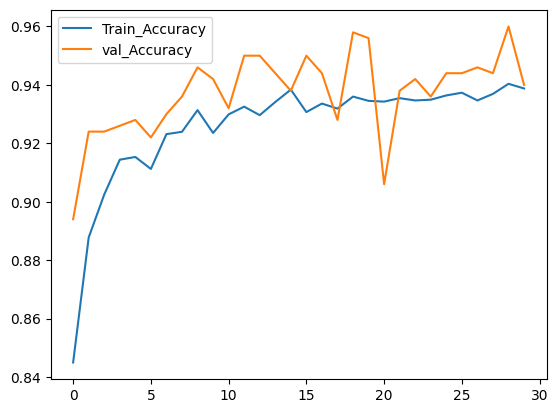

<Figure size 640x480 with 0 Axes>

In [ ]:
# Training loss and validation loss
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_valLoss')


# Training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Train_Accuracy')
plt.plot(history.history['val_accuracy'], label='val_Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_ValAccuracy')

### MODEL EVALUATION :-

In [ ]:
train_result = vgg16_model.evaluate(train_set)
print("Train Accuracy & Loss:",train_result)

test_result = vgg16_model.evaluate(test_set)
print("Testing Accuracy & Loss",test_result)

118/118 [==============================] - 223s 2s/step - loss: 0.1529 - accuracy: 0.9434
Train Accuracy & Loss: [0.15292632579803467, 0.9434137344360352]
8/8 [==============================] - 332s 47s/step - loss: 0.3201 - accuracy: 0.8580
Testing Accuracy & Loss [0.3200925290584564, 0.8579999804496765]


In [ ]:
# Create a dataframe
import pandas as pd
data = pd.DataFrame(zip(train_result,val_result), columns=['Train','Validation'],index=['Loss','Accuracy'])
data

,Train,Validation
Loss,0.152926,0.140115
Accuracy,0.943414,0.958000


### MODEL SAVING :-

In [ ]:
# Saving model with the help of h5
vgg16_model.save('vgg16_model.h5')

### PREDICTION ON TEST DATA :-

In [39]:
y_prediction = vgg16_model.predict(test_set)
y_prediction

8/8 [==============================] - 81s 10s/step


array([[9.99567389e-01, 3.84329120e-04],
       [8.06293726e-01, 1.97040111e-01],
       [9.76120412e-01, 2.39003915e-02],
       [1.65113043e-02, 9.83277977e-01],
       [9.99208391e-01, 7.58242211e-04],
       [8.36595237e-01, 1.63141340e-01],
       [7.54919508e-03, 9.92212713e-01],
       [1.82689331e-03, 9.98049676e-01],
       [9.98626947e-01, 1.28140498e-03],
       [2.93522421e-02, 9.69407260e-01],
       [1.69971436e-02, 9.83573258e-01],
       [9.99219358e-01, 7.06854451e-04],
       [7.46149838e-01, 2.57960618e-01],
       [9.98950779e-01, 9.23962973e-04],
       [6.12369478e-01, 3.85171831e-01],
       [9.96347308e-01, 3.43471696e-03],
       [9.92092848e-01, 7.92470574e-03],
       [1.28519848e-01, 8.71068001e-01],
       [9.87053216e-01, 1.25218052e-02],
       [7.75538981e-01, 2.20677391e-01],
       [9.93998051e-01, 5.81729459e-03],
       [9.99073446e-01, 8.74732737e-04],
       [6.76382855e-02, 9.26587462e-01],
       [6.43385351e-01, 3.47461760e-01],
       [1.350693

### LOADING MODEL :-

In [40]:
# Load Model
from tensorflow.keras.models import load_model
vgg16_model = load_model('vgg16_model.h5')

### VISUALISE SOME TESTING IMAGES :-

1/1 [==============================] - 0s 201ms/step


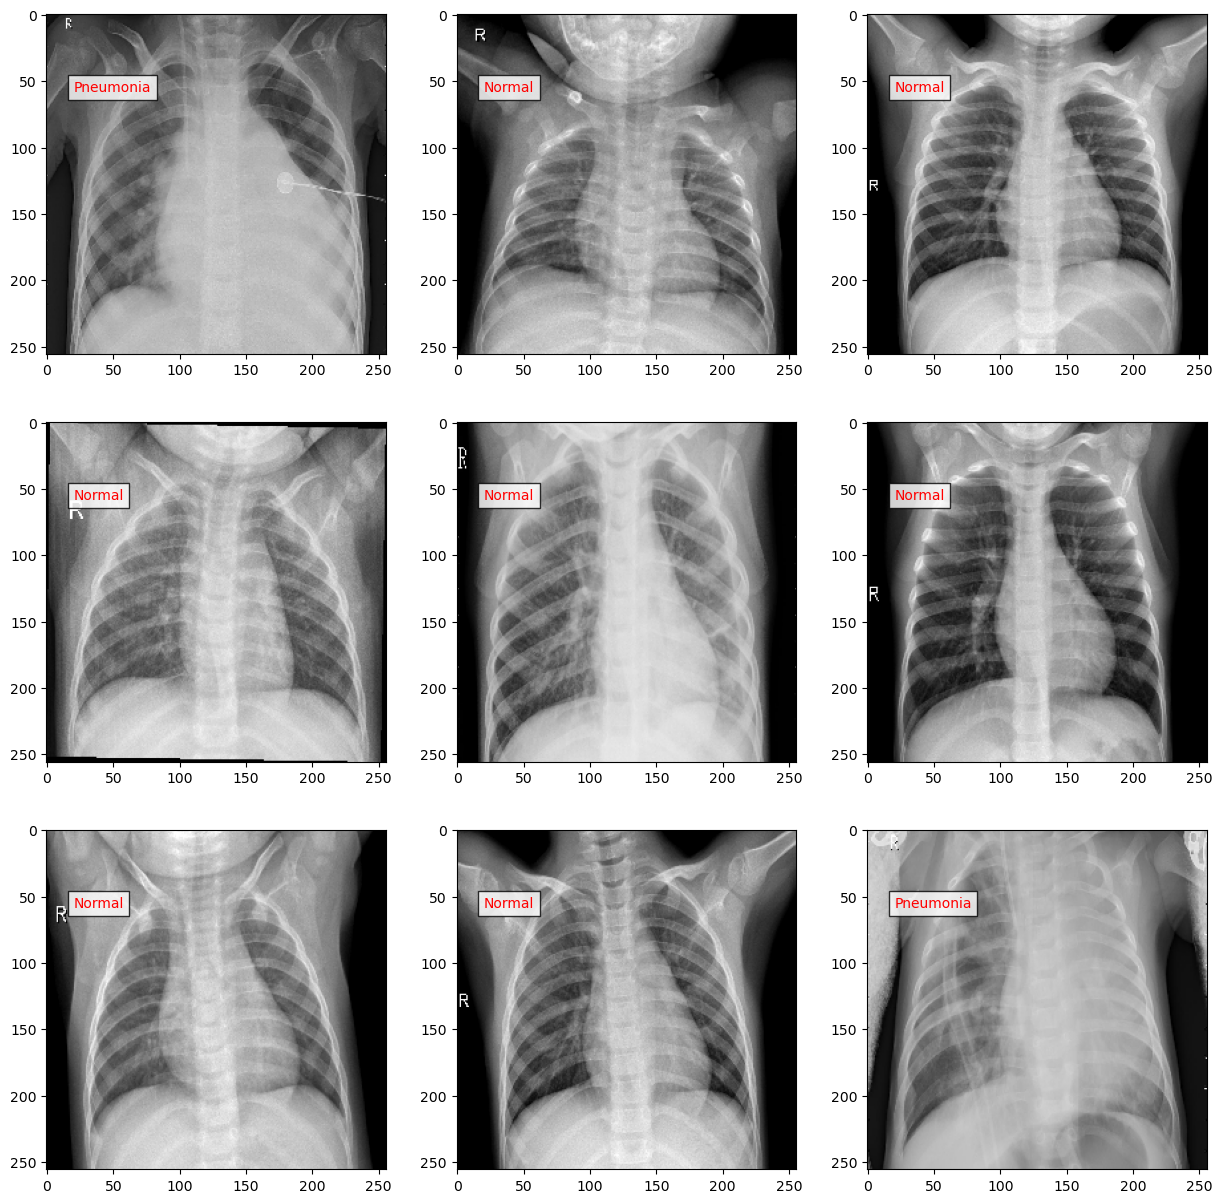

In [38]:
# Visualise the prediction of the model
imgs, labels = next(test_set)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
class_names = ['Normal','Pneumonia']
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = vgg16_model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

### BUILD VGG19 ARCHITECTURE :-

In [5]:
# Import Vgg16 library as shown and add preprocessing layer in front og vgg
vgg19_model = Sequential() # Create model object

pretrained_vgg19_model=tf.keras.applications.vgg19.VGG19(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

# Dont train the existing weights
for layer in pretrained_vgg19_model.layers:
        layer.trainable=False

# Adding more layer and create a object
vgg19_model.add(pretrained_vgg19_model)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dense(2, activation='sigmoid'))

In [6]:
# Visualise the summary of model
vgg19_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 20288066 (77.39 MB)
Trainable params: 263682 (1.01 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


### COMPILE MODEL :-

In [7]:
vgg19_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


### TRAIN MODEL :-

In [8]:
hist = vgg19_model.fit_generator(train_set, validation_data=val_set, epochs=30)

Epoch 1/30
118/118 [==============================] - 1680s 14s/step - loss: 0.4416 - accuracy: 0.8153 - val_loss: 0.3366 - val_accuracy: 0.8680
Epoch 2/30
118/118 [==============================] - 1650s 14s/step - loss: 0.3368 - accuracy: 0.8662 - val_loss: 0.2935 - val_accuracy: 0.9080
Epoch 3/30
118/118 [==============================] - 1701s 14s/step - loss: 0.3079 - accuracy: 0.8799 - val_loss: 0.2407 - val_accuracy: 0.9140
Epoch 4/30
118/118 [==============================] - 1716s 15s/step - loss: 0.2802 - accuracy: 0.8889 - val_loss: 0.2491 - val_accuracy: 0.9080
Epoch 5/30
118/118 [==============================] - 1689s 14s/step - loss: 0.2634 - accuracy: 0.8997 - val_loss: 0.2189 - val_accuracy: 0.9140
Epoch 6/30
118/118 [==============================] - 1732s 15s/step - loss: 0.2440 - accuracy: 0.9070 - val_loss: 0.2093 - val_accuracy: 0.9200
Epoch 7/30
118/118 [==============================] - 1766s 15s/step - loss: 0.2334 - accuracy: 0.9080 - val_loss: 0.2228 - val_ac

### PLOTTING TRAINING & VALIDATION ACCURAY AS WELL AS LOSS & VALIDATION LOSS : -

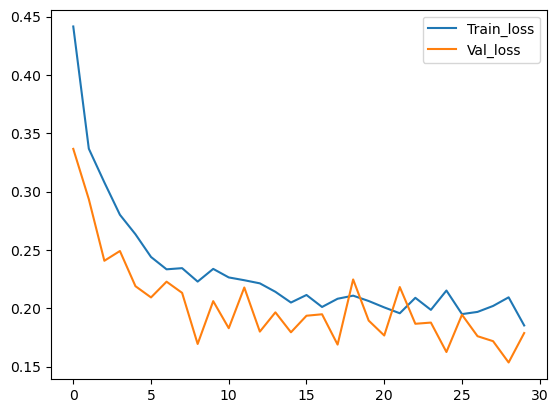

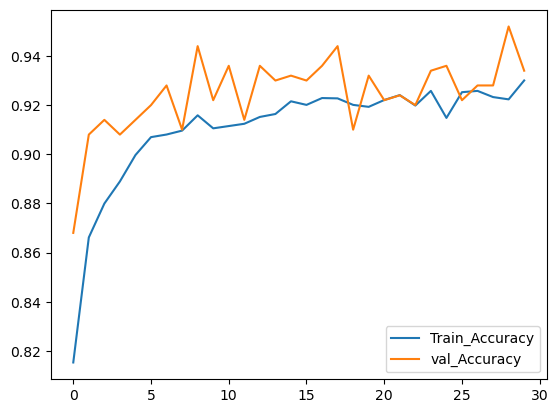

<Figure size 640x480 with 0 Axes>

In [9]:
# Training loss and validation loss
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_valLoss')


# Training accuracy and validation accuracy
plt.plot(hist.history['accuracy'], label='Train_Accuracy')
plt.plot(hist.history['val_accuracy'], label='val_Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_ValAccuracy')

### MODEL EVALUATION :-

In [10]:
train_vgg19_result = vgg19_model.evaluate(train_set)
print("Train Accuracy & Loss:",train_vgg19_result)
print("="*50)
val_vgg19_result = vgg19_model.evaluate(val_set)
print("val Accuracy & Loss",val_vgg19_result)
print("="*50)
test_vgg19_result = vgg19_model.evaluate(test_set)
print("Testing Accuracy & Loss",test_vgg19_result)
print("="*50)

118/118 [==============================] - 1562s 13s/step - loss: 0.2100 - accuracy: 0.9172
Train Accuracy & Loss: [0.21001505851745605, 0.9171746373176575]
8/8 [==============================] - 103s 13s/step - loss: 0.1812 - accuracy: 0.9240
val Accuracy & Loss [0.18118005990982056, 0.9240000247955322]
8/8 [==============================] - 101s 12s/step - loss: 0.4184 - accuracy: 0.8220
Testing Accuracy & Loss [0.41836586594581604, 0.8220000267028809]


In [11]:
# Create a dataframe
import pandas as pd
vgg19_data = pd.DataFrame(zip(train_vgg19_result,val_vgg19_result), columns=['Train','Validation'],index=['Loss','Accuracy'])
vgg19_data

,Train,Validation
Loss,0.210015,0.18118
Accuracy,0.917175,0.92400


### MODEL SAVING :-

In [12]:
# Saving model with the help of h5
vgg19_model.save('vgg19_model.h5')

### PREDICTION ON TEST DATA :-

In [8]:
prediction = vgg19_model.predict(test_set)
prediction

8/8 [==============================] - 178s 22s/step


array([[7.86471739e-03, 9.91806448e-01],
       [9.89396691e-01, 9.98894405e-03],
       [3.75477433e-01, 6.17911935e-01],
       [3.03078830e-01, 6.83480382e-01],
       [9.78686512e-01, 1.90697331e-02],
       [6.82341039e-01, 3.10890198e-01],
       [9.95362461e-01, 4.22401540e-03],
       [9.85395372e-01, 1.37558077e-02],
       [8.88709545e-01, 1.10777996e-01],
       [9.97119844e-01, 2.65011378e-03],
       [9.98410225e-01, 1.45292166e-03],
       [9.92052138e-01, 7.43071130e-03],
       [4.88438696e-01, 5.01432002e-01],
       [9.98470306e-01, 1.35891803e-03],
       [9.97573316e-01, 2.23005074e-03],
       [9.77818727e-01, 2.17989832e-02],
       [9.99806345e-01, 1.69267863e-04],
       [9.99420345e-01, 5.01744275e-04],
       [3.07175905e-01, 6.90458238e-01],
       [9.99453962e-01, 4.96539113e-04],
       [1.05062068e-01, 8.89106035e-01],
       [3.71284820e-02, 9.63778317e-01],
       [9.99625802e-01, 3.31708783e-04],
       [9.43916798e-01, 5.49324974e-02],
       [9.995898

### LOADING MODEL :-

In [46]:
# Load Model
from tensorflow.keras.models import load_model
vgg19_model = load_model('vgg19_model.h5')

### VISUALISE SOME TESTING IMAGES :-

1/1 [==============================] - 0s 227ms/step


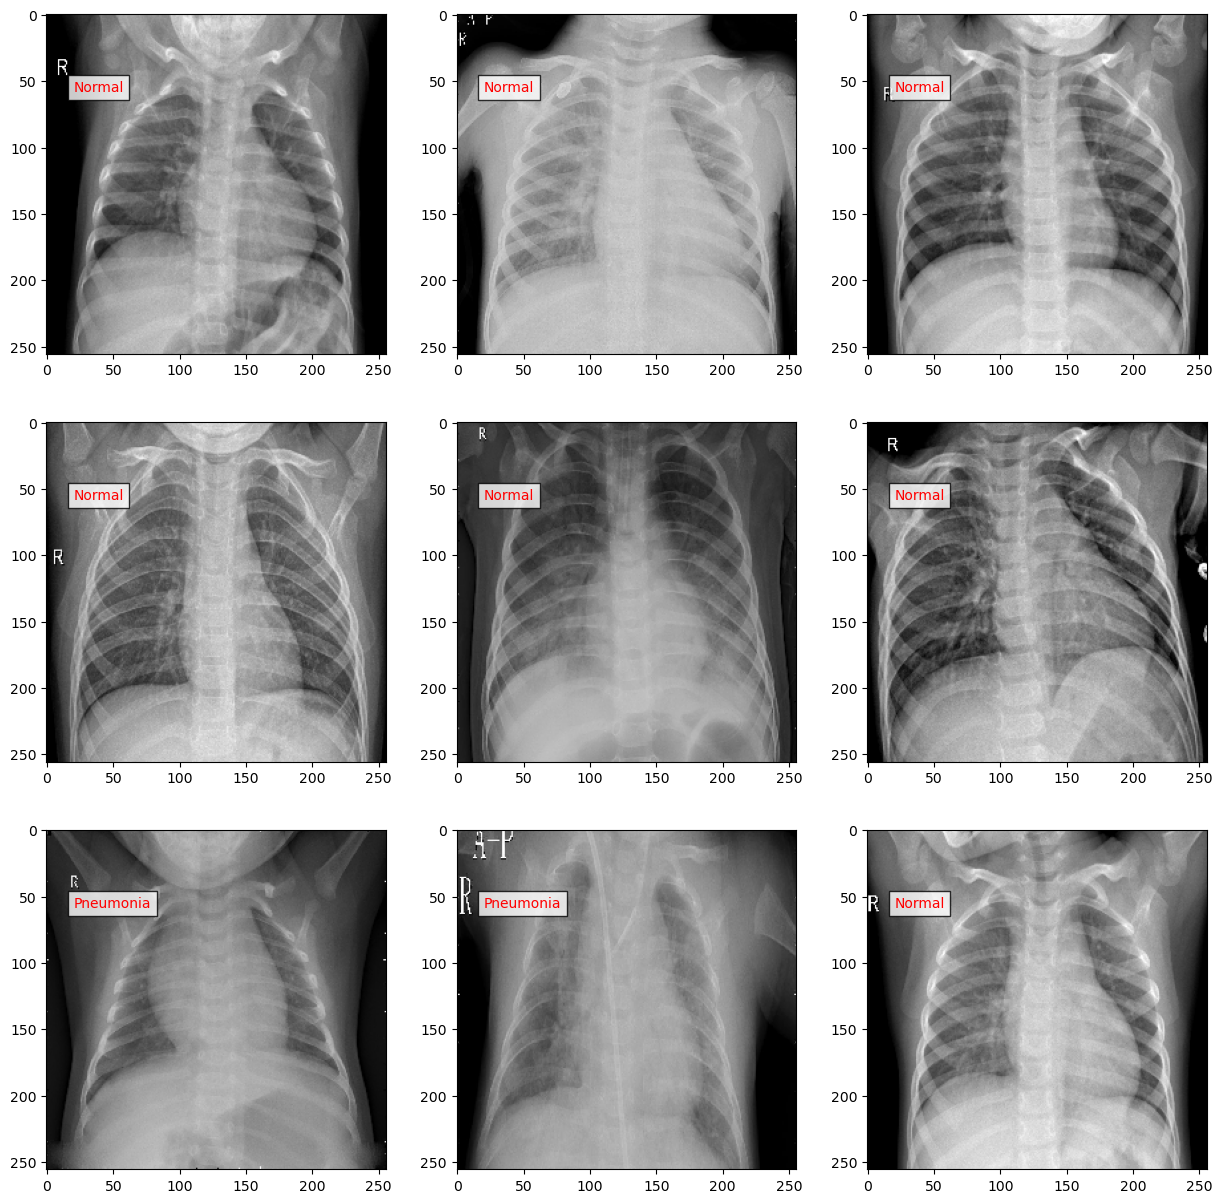

In [26]:
# Visualise the prediction of the model
imgs, labels = next(test_set)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
class_names = ['Normal','Pneumonia']
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = vgg19_model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

### CONCLUSION :-


* VGG16 model perform well on training as well as testing data and both training and testing loss is less. as well as model       predict correct result.
* VGG19 model is not perform good on testing data.
* From above models we are select VGG16 model.